In [3]:
# FIZ A IMPORTAÇÃO DOS PACOTES QUE SERÃO USADOS

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

warnings.filterwarnings('ignore')

In [5]:
# FIZ A LEITURA E ARMAZENAMENTO DA TABELA COM OS MEUS DADOS PARA
# MANIPULADO NO PYTHON/JUPYTER NOTEBOOK

In [8]:
dados = pd.read_csv('dataset.csv')
print("Shape of the data= ", dados.shape)
dados.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [ ]:
# FIZ UMA ORGANIZAÇÃO DOS DADOS NUMA NOVA TABELA, PARA PRESERVAR
# A TABELA ORIGINAL E TIREI ELEMENTOS DA TABELA QUE NÃO VOU USAR
# NA ANÁLISE

In [ ]:
df = dados.rename(columns={'track_name':'name' , 'track_id':'id' })
df = df[["acousticness","artists","danceability","duration_ms","energy","explicit","id","instrumentalness","key","liveness","loudness","mode","name","popularity","speechiness","tempo","valence","Unnamed: 0","album_name","time_signature","track_genre"]]
df = df.drop(columns = ['id', 'name','artists','album_name',"Unnamed: 0","duration_ms","popularity"])

In [ ]:
# DEMONSTRAÇÃO DE COMO ESTÁ A TABELA QUE VOU UTILIZAR 
# OS DADOS NO MOMENTO ATUAL

In [ ]:
df.info()

In [ ]:
# ESTOU CONFERINDO SE NÃO TEM VALOR NULL EM DADOS NA TABELA

In [7]:
df.isnull().sum()

NameError: name 'df' is not defined

In [11]:
# VOU FAZER UM PROCESSO DE NORMALIZAÇÃO DOS DADOS COMEÇANDO POR
# CONVERTER OS VALORES "FALSE" "TRUE" EM 0 E 1

In [12]:
# CONVERTENDO EXPLICIT EM VALORES NUMÉRICOS

In [13]:
X = df
y = df['explicit']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['explicit'] = le.fit_transform(X['explicit'])

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      114000 non-null  float64
 1   danceability      114000 non-null  float64
 2   energy            114000 non-null  float64
 3   explicit          114000 non-null  int64  
 4   instrumentalness  114000 non-null  float64
 5   key               114000 non-null  int64  
 6   liveness          114000 non-null  float64
 7   loudness          114000 non-null  float64
 8   mode              114000 non-null  int64  
 9   speechiness       114000 non-null  float64
 10  tempo             114000 non-null  float64
 11  valence           114000 non-null  float64
 12  time_signature    114000 non-null  int64  
 13  track_genre       114000 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 12.2+ MB


In [16]:
# DEMONSTRANDO A TRANSFORMAÇÃO DO VALOR EXPLICIT DE BOOLEANO
# ( FALSE/ TRUE) EM INTEIRO (0 E 1)

In [17]:
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,track_genre
0,0.0322,0.676,0.4610,0,0.000001,1,0.3580,-6.746,0,0.1430,87.917,0.715,4,acoustic
1,0.9240,0.420,0.1660,0,0.000006,1,0.1010,-17.235,1,0.0763,77.489,0.267,4,acoustic
2,0.2100,0.438,0.3590,0,0.000000,0,0.1170,-9.734,1,0.0557,76.332,0.120,4,acoustic
3,0.9050,0.266,0.0596,0,0.000071,0,0.1320,-18.515,1,0.0363,181.740,0.143,3,acoustic
4,0.4690,0.618,0.4430,0,0.000000,2,0.0829,-9.681,1,0.0526,119.949,0.167,4,acoustic


In [ ]:
# CONVERTER OS VALORES DE TRACK_GENRE EM 0 À QUANTIDADE DE GÊNEROS PRESENTES

In [ ]:
# CONVERTENDO EXPLICIT EM VALORES NUMÉRICOS

In [18]:
X = df
y = df['track_genre']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['track_genre'] = le.fit_transform(X['track_genre'])

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      114000 non-null  float64
 1   danceability      114000 non-null  float64
 2   energy            114000 non-null  float64
 3   explicit          114000 non-null  int64  
 4   instrumentalness  114000 non-null  float64
 5   key               114000 non-null  int64  
 6   liveness          114000 non-null  float64
 7   loudness          114000 non-null  float64
 8   mode              114000 non-null  int64  
 9   speechiness       114000 non-null  float64
 10  tempo             114000 non-null  float64
 11  valence           114000 non-null  float64
 12  time_signature    114000 non-null  int64  
 13  track_genre       114000 non-null  int32  
dtypes: float64(9), int32(1), int64(4)
memory usage: 11.7 MB


In [ ]:
# DEMONSTRANDO A TRANSFORMAÇÃO DE TRACK_GENRE PARA VARIÁVEIS DISCRETAS COMEÇANDO POR 0

In [21]:
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,track_genre
0,0.0322,0.676,0.4610,0,0.000001,1,0.3580,-6.746,0,0.1430,87.917,0.715,4,0
1,0.9240,0.420,0.1660,0,0.000006,1,0.1010,-17.235,1,0.0763,77.489,0.267,4,0
2,0.2100,0.438,0.3590,0,0.000000,0,0.1170,-9.734,1,0.0557,76.332,0.120,4,0
3,0.9050,0.266,0.0596,0,0.000071,0,0.1320,-18.515,1,0.0363,181.740,0.143,3,0
4,0.4690,0.618,0.4430,0,0.000000,2,0.0829,-9.681,1,0.0526,119.949,0.167,4,0


In [22]:
# FAZENDO A NORMALIZAÇÃO DOS DADOS DA TABELA USANDO O MÉTODO MINMAXSCALER

In [23]:
cols = X.columns

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X= ms.fit_transform(X)

In [25]:
X = pd.DataFrame(X, columns = [cols])

In [26]:
# VERIFICANDO SE OS DADOS FORAM NORMALIZADOS 

In [27]:
X.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature,track_genre
0,0.032329,0.686294,0.4610,0.0,0.000001,0.090909,0.3580,0.791392,0.0,0.148187,0.361245,0.718593,0.8,0.0
1,0.927711,0.426396,0.1660,0.0,0.000006,0.090909,0.1010,0.597377,1.0,0.079067,0.318397,0.268342,0.8,0.0
2,0.210843,0.444670,0.3590,0.0,0.000000,0.000000,0.1170,0.736123,1.0,0.057720,0.313643,0.120603,0.8,0.0
3,0.908635,0.270051,0.0596,0.0,0.000071,0.000000,0.1320,0.573701,1.0,0.037617,0.746758,0.143719,0.6,0.0
4,0.470884,0.627411,0.4430,0.0,0.000000,0.181818,0.0829,0.737103,1.0,0.054508,0.492863,0.167839,0.8,0.0


In [28]:
# METODO DO COTOVELO

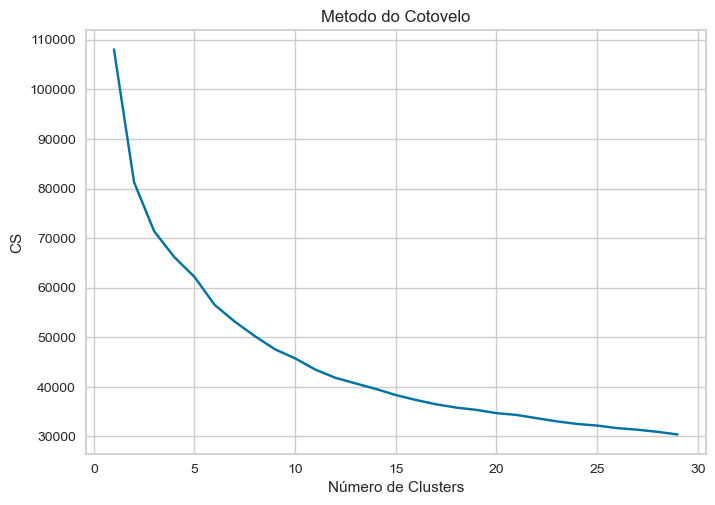

In [30]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 30), cs)
plt.title('Metodo do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
# MÉTODO DA SILHUETA

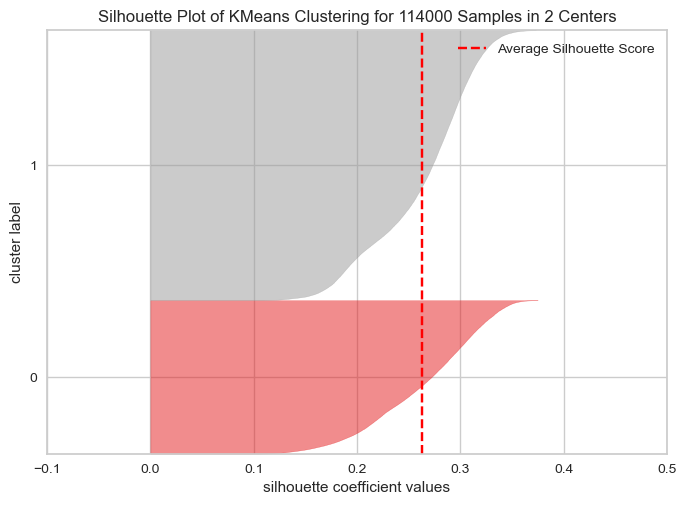

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

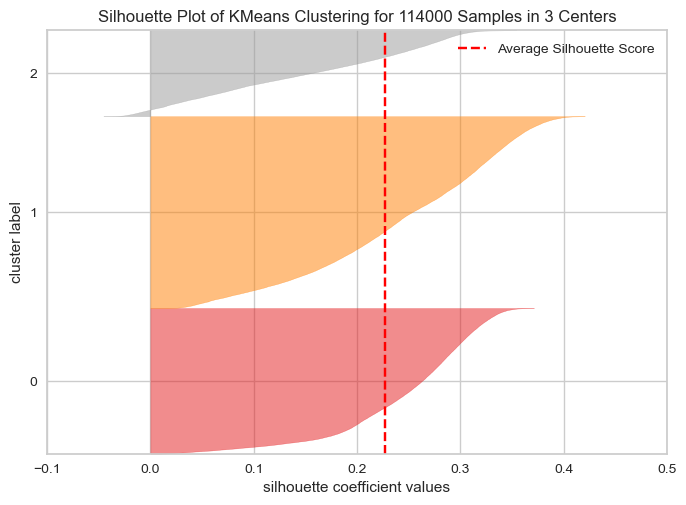

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

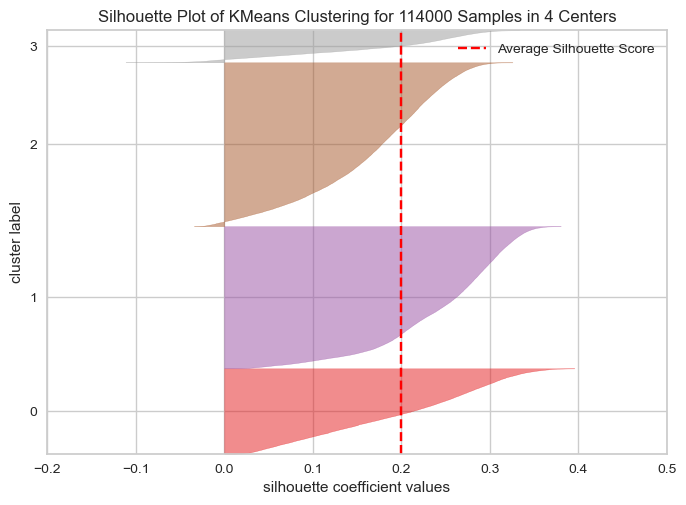

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

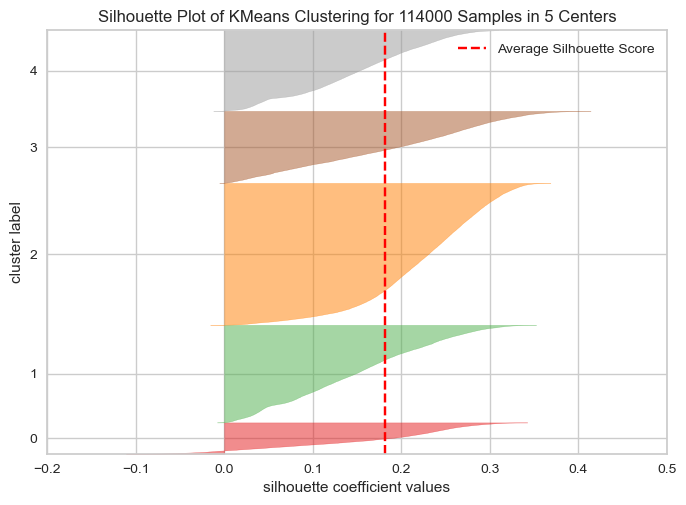

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

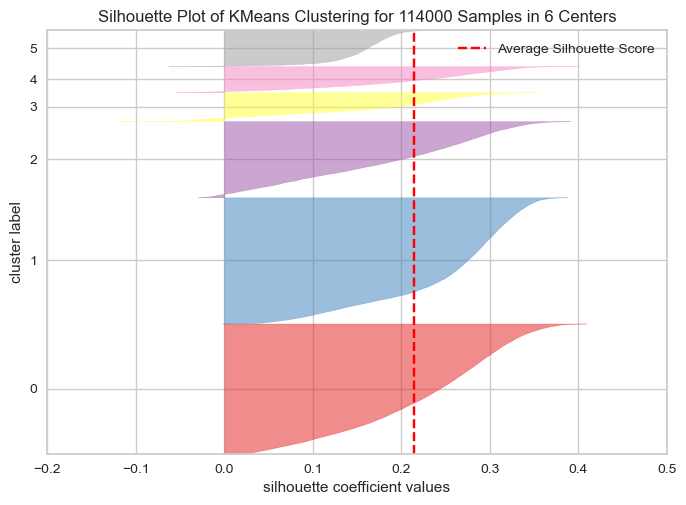

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

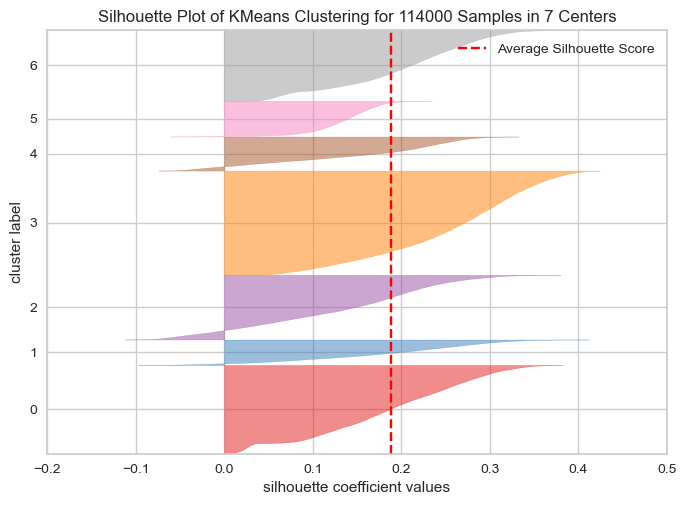

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

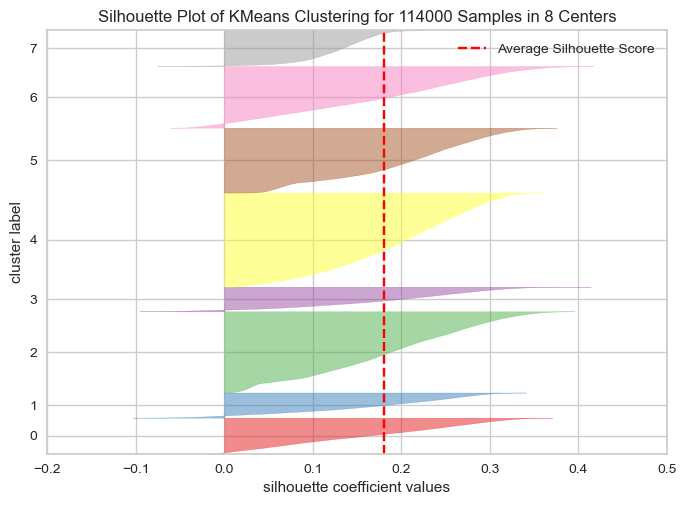

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

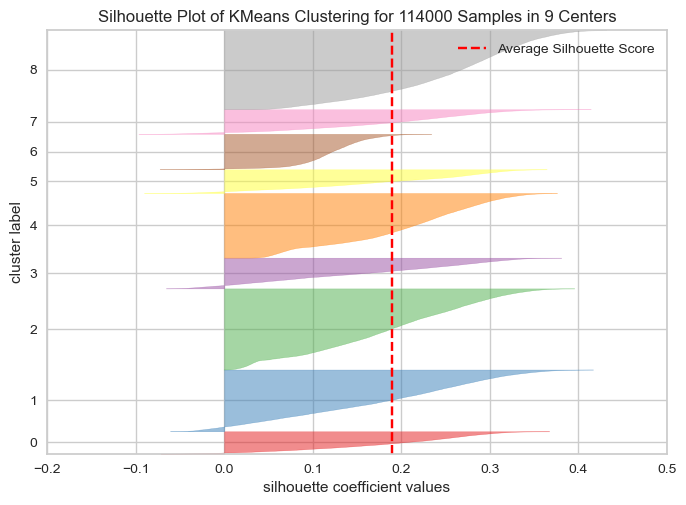

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

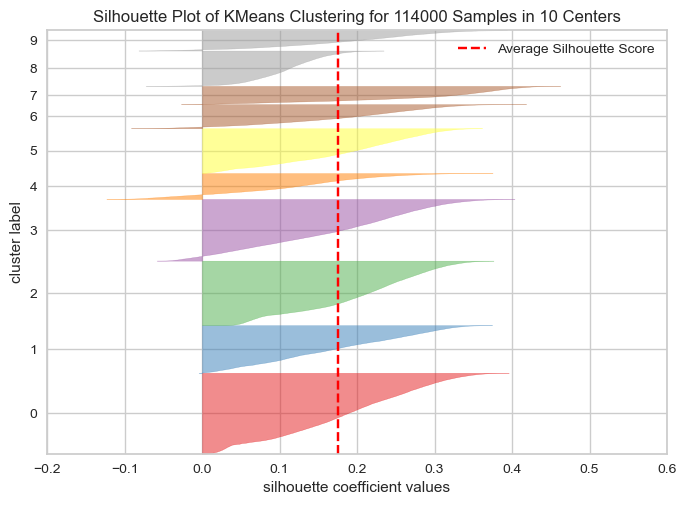

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

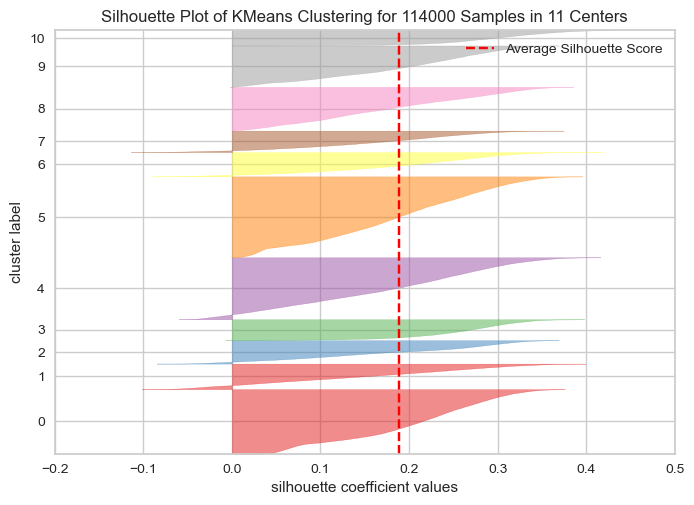

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

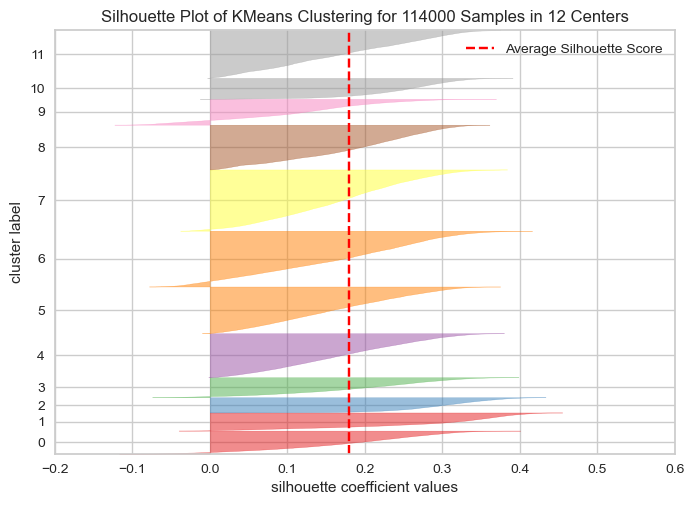

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

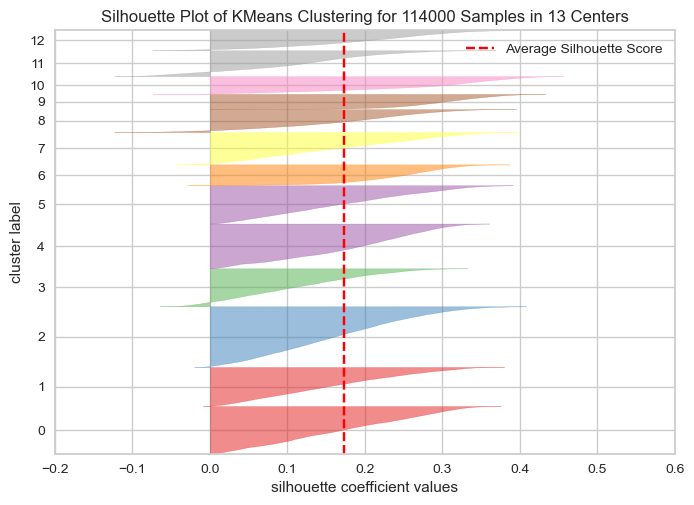

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

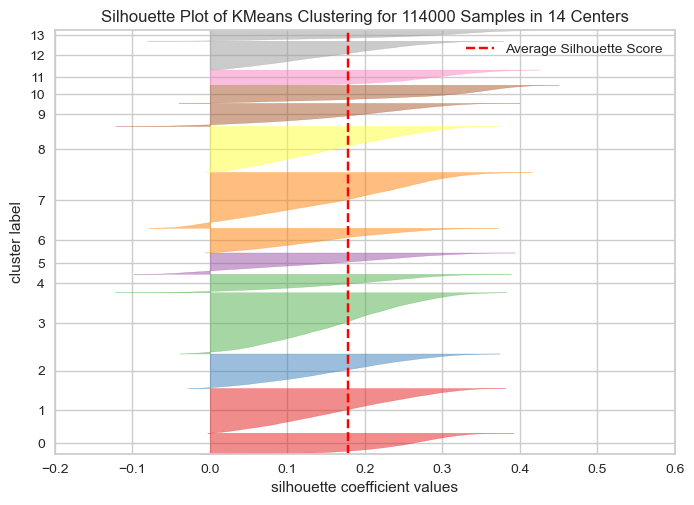

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

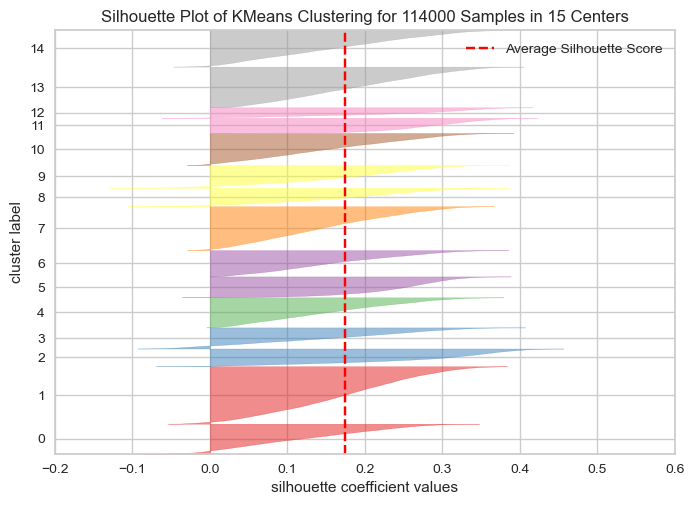

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

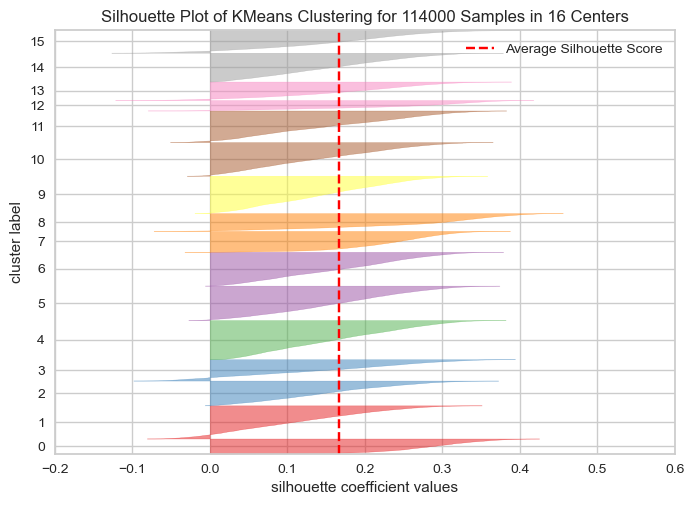

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 16 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=16, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

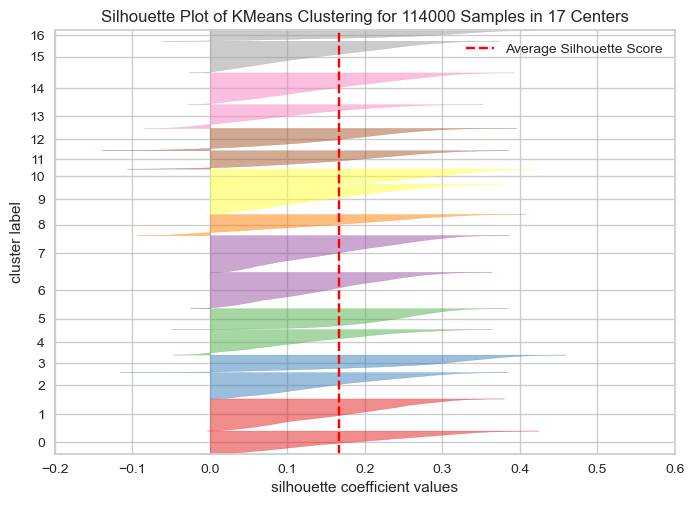

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 17 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=17, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

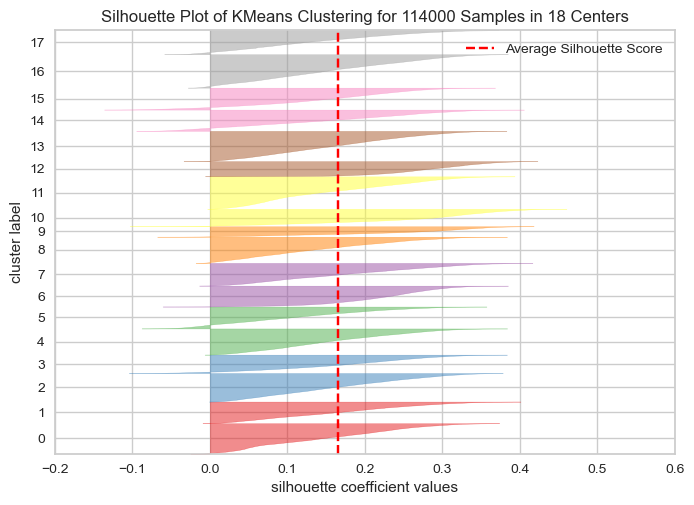

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 114000 Samples in 18 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(n_clusters=18, init='k-means++', n_init=10, max_iter=100, random_state=42))
model.fit(X)
model.show()

In [ ]:
# SALVANDO O TIPO DE CLUSTER DE CADA MÚSICA NUMA NOVA COLUNA NA TABELA ORIGINAL

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 16, random_state=42)
features = kmeans.fit_predict(X)

In [51]:
dados['cluster'] = features

In [ ]:
# CONFERINDO A NOVA TABELA COM A ADIÇÃO DA COLUNA DE CLUSTER

In [2]:
dados

NameError: name 'dados' is not defined

In [ ]:
# EXIBINDO A QUANTIDADE DE MUSICAS EM CADA CLUSTER

In [53]:
print('Número de músicas por Cluster = \n', dados['cluster'].value_counts())

Número de músicas por Cluster = 
 4     10547
9     10078
5      9277
6      9097
10     9048
1      8930
11     8518
14     7764
2      6671
15     6047
3      5739
7      5630
13     4973
8      4786
0      4087
12     2808
Name: cluster, dtype: int64


In [ ]:
# EXPORTANDO OS DADOS GERADOS PARA UMA PLANILHA DO EXCEL 

In [54]:
dados.to_excel('Musicas_Cluster.xlsx')

In [1]:
dados.to_csv('Musicas_Cluster.csv')

NameError: name 'dados' is not defined

In [ ]:
# EXIBIÇÃO NÚMERICA DO SCORE K DE CADA CLUSTER COM O MÉTODO DA SILHUETA

In [48]:
from sklearn import datasets
from sklearn.cluster import KMeans

for i in [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18]:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.263
Silhouetter Score: 0.227
Silhouetter Score: 0.199
Silhouetter Score: 0.181
Silhouetter Score: 0.215
Silhouetter Score: 0.189
Silhouetter Score: 0.180
Silhouetter Score: 0.190
Silhouetter Score: 0.176
Silhouetter Score: 0.188
Silhouetter Score: 0.179
Silhouetter Score: 0.173
Silhouetter Score: 0.178
Silhouetter Score: 0.174
Silhouetter Score: 0.167
Silhouetter Score: 0.167
Silhouetter Score: 0.166
